## Import the relevant libraries

In [6]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Load the data

In [2]:
data=pd.read_csv(r'DataSet/1.02.+Multiple+linear+regression.csv')
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [4]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


## Create multiple regression

## Define the dependent and the independent variables

In [5]:
y=data['SAT']
x1=data[['GPA','Rand 1,2,3']]

## Explore the data

<AxesSubplot:xlabel='GPA', ylabel='SAT'>

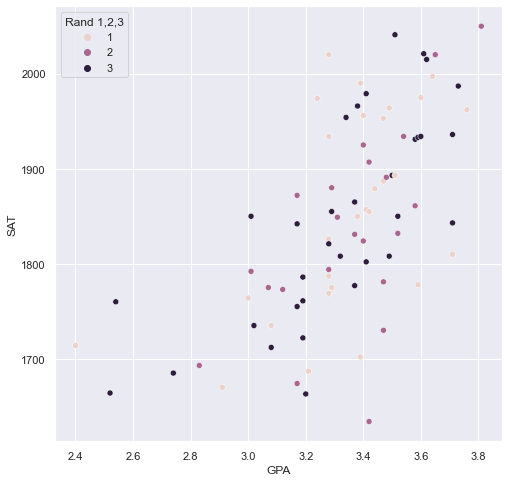

In [14]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=data, x="GPA", y="SAT", hue="Rand 1,2,3",ax=ax)

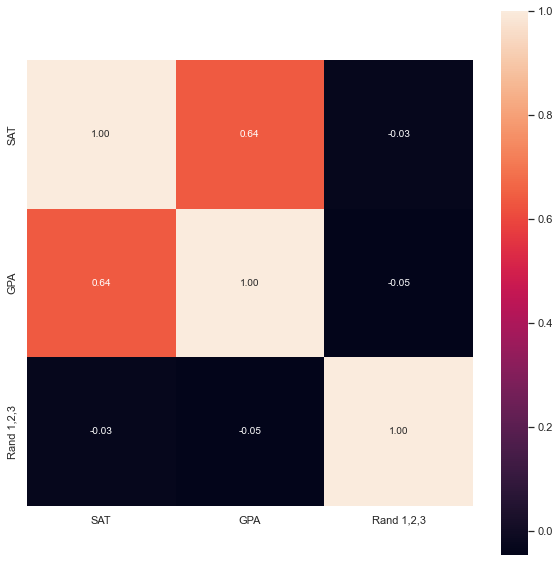

In [22]:
corr=data.corr()
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmax=1, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10});

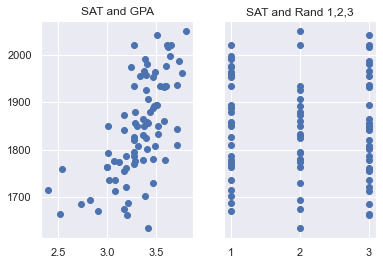

In [18]:
fig, (ax1,ax2)=plt.subplots(ncols=2,sharey=True)
ax1.scatter(data['GPA'],data['SAT'])
ax1.set_title('SAT and GPA')
ax2.scatter(data['Rand 1,2,3'],data['SAT'])
ax2.set_title('SAT and Rand 1,2,3')
plt.show()

- Rand 1,2,3 must be removed from the reg because no linear relation , but lets try by it and see the results

## Regression itself

In [23]:
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAT   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     27.68
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           6.89e-10
Time:                        10:11:40   Log-Likelihood:                -487.37
No. Observations:                  84   AIC:                             980.7
Df Residuals:                      81   BIC:                             988.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1029.3477    113.293      9.086      0.000     803.931    1254.764
GPA          245.1772     32.991      7.432      0.000     179.535     310.819
Rand 1,2,3    -0.2779     10.478     -0.027      0.979     -21.126      20.571
==============================================================================
Omnibus:                        0.574   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.750   Jarque-Bera (JB):                0.462
Skew:                          -0.180   Prob(JB):                        0.794
Kurtosis:                       2.949   Cond. No.                         53.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- as we see Rand 1,2,3 p>0.05 so it is no signficant from zero 
- adj.R2 < R2
- from heatmap correlation between SAT and Rand 1,2,3 close to zero
=>> lets try regression with out Rand 1,2,3

In [24]:
x1=data['GPA']
x=sm.add_constant(x1)
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAT   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           7.20e-11
Time:                        10:17:47   Log-Likelihood:                -487.37
No. Observations:                  84   AIC:                             978.7
Df Residuals:                      82   BIC:                             983.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1028.6407    109.438      9.399      0.000     810.933    1246.348
GPA          245.2176     32.755      7.487      0.000     180.058     310.377
==============================================================================
Omnibus:                        0.566   Durbin-Watson:                   2.275
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.455
Skew:                          -0.179   Prob(JB):                        0.796
Kurtosis:                       2.949   Cond. No.                         45.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""